In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [3]:
data = pd.read_csv('data.csv')

In [4]:
data.head()

,dim_claim_id,dim_pa_id,dim_date_id,bin,drug,reject_code,pharmacy_claim_approved,correct_diagnosis,tried_and_failed,contraindication,pa_approved,claim_reason,pa_feats
0,3,2.0,1,417740,A,76.0,0,1,0,0,1,CD,0
1,33,16.0,1,417740,A,76.0,0,1,1,1,0,CDTFCI,6
2,59,25.0,1,417740,A,76.0,0,1,0,0,1,CD,0
3,110,49.0,1,417740,B,70.0,0,1,0,0,0,CD,0
4,119,50.0,1,417740,B,70.0,0,1,0,0,0,CD,0


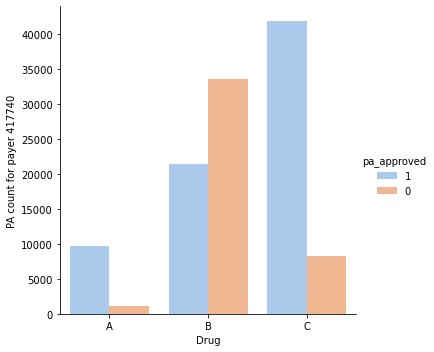

In [5]:
payer_plot=sns.catplot(x="drug", hue="pa_approved", kind="count",hue_order=[1,0],palette="pastel",data=data)
payer_plot.set_axis_labels("Drug","PA count for payer 417740")

## One Hot Encoding PA features and drugs

In [6]:
dummies = pd.get_dummies(data['claim_reason'],drop_first=True)
data = pd.concat([data,dummies], axis= 1)
data.head()

,dim_claim_id,dim_pa_id,dim_date_id,bin,drug,reject_code,pharmacy_claim_approved,correct_diagnosis,tried_and_failed,contraindication,pa_approved,claim_reason,pa_feats,CDCI,CDTF,CDTFCI,CI,None,TF,TFCI
0,3,2.0,1,417740,A,76.0,0,1,0,0,1,CD,0,0,0,0,0,0,0,0
1,33,16.0,1,417740,A,76.0,0,1,1,1,0,CDTFCI,6,0,0,1,0,0,0,0
2,59,25.0,1,417740,A,76.0,0,1,0,0,1,CD,0,0,0,0,0,0,0,0
3,110,49.0,1,417740,B,70.0,0,1,0,0,0,CD,0,0,0,0,0,0,0,0
4,119,50.0,1,417740,B,70.0,0,1,0,0,0,CD,0,0,0,0,0,0,0,0


Separating the dataset into three datasets by drug and making training and test dataframes.

In [7]:
data_A = data[data['drug']=='A']
data_B = data[data['drug']=='B']
data_C = data[data['drug']=='C']

In [8]:
X_A = data_A[['CDCI','CDTF','CDTFCI','CI','None','TF','TFCI']]
y_A = data_A['pa_approved']
X_A_train, X_A_test,y_A_train,y_A_test = train_test_split(X_A,y_A,test_size=0.20,random_state=614,shuffle=True,stratify=y_A)

In [9]:
X_B = data_B[['CDCI','CDTF','CDTFCI','CI','None','TF','TFCI']]
y_B = data_B['pa_approved']
X_B_train, X_B_test,y_B_train,y_B_test = train_test_split(X_B,y_B,test_size=0.20,random_state=614,shuffle=True,stratify=y_B)

In [10]:
X_C = data_C[['CDCI','CDTF','CDTFCI','CI','None','TF','TFCI']]
y_C = data_C['pa_approved']
X_C_train, X_C_test,y_C_train,y_C_test = train_test_split(X_C,y_C,test_size=0.20,random_state=614,shuffle=True,stratify=y_C)

In [11]:
data_drugs = data.copy()
dummies_drugs = pd.get_dummies(data['drug'],drop_first=True)
data_drugs = pd.concat([data_drugs,dummies_drugs], axis= 1)
data_drugs.head()

,dim_claim_id,dim_pa_id,dim_date_id,bin,drug,reject_code,pharmacy_claim_approved,correct_diagnosis,tried_and_failed,contraindication,...,pa_feats,CDCI,CDTF,CDTFCI,CI,None,TF,TFCI,B,C
0,3,2.0,1,417740,A,76.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,33,16.0,1,417740,A,76.0,0,1,1,1,...,6,0,0,1,0,0,0,0,0,0
2,59,25.0,1,417740,A,76.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,110,49.0,1,417740,B,70.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,119,50.0,1,417740,B,70.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
X_drugs = data_drugs[['B','C','CDCI','CDTF','CDTFCI','CI','None','TF','TFCI']]
y_drugs = data_drugs['pa_approved']
X_drugs_train, X_drugs_test,y_drugs_train,y_drugs_test = train_test_split(X_drugs,y_drugs,test_size=0.20,random_state=614,shuffle=True,stratify=y_drugs)

### Logistic Regression

C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

CV Mean Accuracy is [0.90119051 0.90119051 0.90119051 0.90119051 0.90119051 0.90119051
 0.90119051 0.90119051 0.90119051 0.90119051 0.90119051 0.90119051
 0.90119051 0.90119051 0.90119051 0.90119051 0.90119051 0.90119051
 0.90119051 0.90119051 0.90119051 0.90119051 0.90119051 0.90119051
 0.90119051 0.90119051 0.90119051 0.90119051 0.90119051 0.90119051
 0.90119051 0.90119051 0.90119051 0.90119051 0.90119051 0.90119051
 0.90119051 0.90119051 0.90119051 0.90119051 0.90119051 0.90119051
 0.90119051 0.90119051 0.90119051 0.90119051 0.90119051 0.90119051
 0.90119051 0.90119051 0.90119051 0.90119051 0.90119051 0.90119051
 0.90119051 0.89957335 0.89841781 0.89841781 0.89864903 0.89945828
 0.89945828 0.89945828 0.89945828 0.89945828 0.89945828 0.8852473
 0.87704201 0.87542351 0.87542351 0.87542351 0.87542351 0.87542351
 0.87542351 0.87542351 0.87542351 0.87542351 0.87542351 0.87542351
 0.87542351 0.87334259 0.87045415 0.86375162 0.86375162 0.82769667
 0.81024536 0.81024536 0.81024536 0.8102453

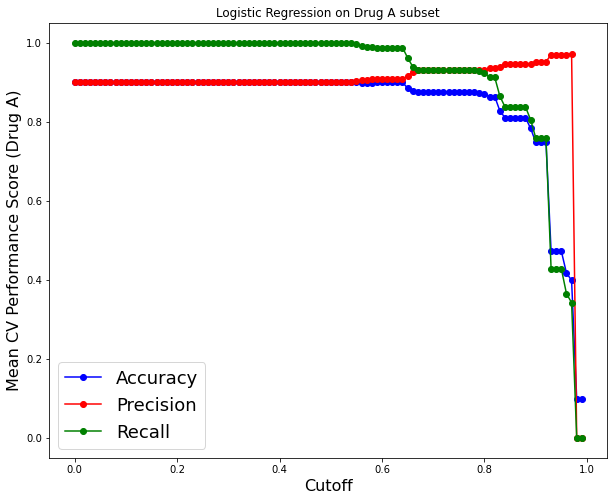

In [13]:
kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)
cutoffs = np.arange(0,1,.01)

accs_lr = np.zeros((10,len(cutoffs)))
precs_lr = np.zeros((10,len(cutoffs)))
recs_lr = np.zeros((10,len(cutoffs)))

log_reg = LogisticRegression()

i = 0
for train_index,test_index in kfold.split(X_A_train,y_A_train):
    X_train_train,X_train_test = X_A_train.iloc[train_index],X_A_train.iloc[test_index]
    y_train_train,y_train_test = y_A_train.iloc[train_index],y_A_train.iloc[test_index]
    
    
    
    for j in range(len(cutoffs)):
        log_reg_clone = clone(log_reg)
        log_reg_clone.fit(X_train_train,y_train_train)
        probs = log_reg_clone.predict_proba(X_train_test)[:,1]
        
        y_pred = 1*(probs > cutoffs[j])
        accs_lr[i,j] = accuracy_score(y_train_test,y_pred)
        precs_lr[i,j] = precision_score(y_train_test,y_pred)
        recs_lr[i,j] = recall_score(y_train_test,y_pred)
    i=i+1
print("CV Mean Accuracy is",np.mean(accs_lr,axis=0))
print("CV Mean Precision is",np.mean(precs_lr,axis=0))
print("CV Mean Recall is",np.mean(recs_lr,axis=0))

plt.figure(figsize=(10,8))    
plt.plot(np.arange(0,1,0.01), np.mean(accs_lr,axis=0),'b-o', label="Accuracy")
plt.plot(np.arange(0,1,0.01), np.mean(precs_lr,axis=0),'r-o', label="Precision")
plt.plot(np.arange(0,1,0.01), np.mean(recs_lr,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score (Drug A)",fontsize=16)
plt.xlabel("Cutoff",fontsize=16)
plt.title("Logistic Regression on Drug A subset")

plt.legend(fontsize=18)

plt.show() 

C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

CV Mean Accuracy is [0.38997911 0.38997911 0.38997911 0.38997911 0.38997911 0.3931364
 0.40851282 0.40851282 0.47594717 0.47594717 0.47594717 0.47594717
 0.47594717 0.47594717 0.47819615 0.48791679 0.48962018 0.48962018
 0.48962018 0.51326518 0.54083729 0.54083729 0.54083729 0.54083729
 0.54083729 0.54083729 0.54083729 0.54083729 0.54083729 0.55632673
 0.57386186 0.57386186 0.57386186 0.57386186 0.57386186 0.57386186
 0.57386186 0.65828572 0.65828572 0.65828572 0.65828572 0.65828572
 0.65828572 0.65828572 0.65828572 0.65828572 0.65828572 0.65828572
 0.65828572 0.65828572 0.65828572 0.65742271 0.65742271 0.65742271
 0.65742271 0.65742271 0.65742271 0.65742271 0.61002089 0.61002089
 0.61002089 0.61002089 0.61002089 0.61002089 0.61002089 0.61002089
 0.61002089 0.61002089 0.61002089 0.61002089 0.61002089 0.61002089
 0.61002089 0.61002089 0.61002089 0.61002089 0.61002089 0.61002089
 0.61002089 0.61002089 0.61002089 0.61002089 0.61002089 0.61002089
 0.61002089 0.61002089 0.61002089 0.6100208

C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


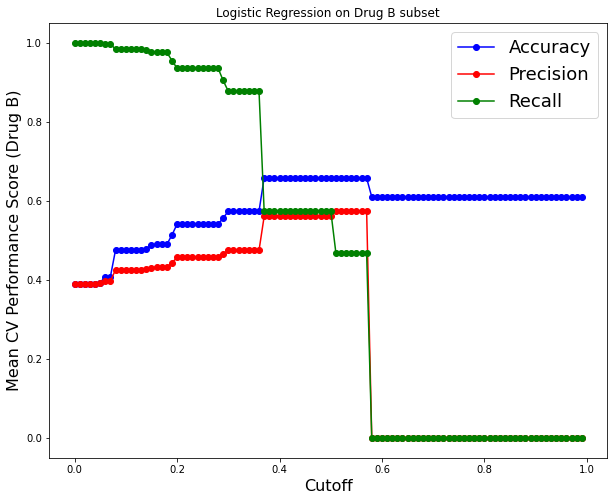

In [14]:
kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)
cutoffs = np.arange(0,1,.01)

accs_lr = np.zeros((10,len(cutoffs)))
precs_lr = np.zeros((10,len(cutoffs)))
recs_lr = np.zeros((10,len(cutoffs)))

log_reg = LogisticRegression()

i = 0
for train_index,test_index in kfold.split(X_B_train,y_B_train):
    X_train_train,X_train_test = X_B_train.iloc[train_index],X_B_train.iloc[test_index]
    y_train_train,y_train_test = y_B_train.iloc[train_index],y_B_train.iloc[test_index]
    
    
    
    for j in range(len(cutoffs)):
        log_reg_clone = clone(log_reg)
        log_reg_clone.fit(X_train_train,y_train_train)
        probs = log_reg_clone.predict_proba(X_train_test)[:,1]
        
        y_pred = 1*(probs > cutoffs[j])
        accs_lr[i,j] = accuracy_score(y_train_test,y_pred)
        precs_lr[i,j] = precision_score(y_train_test,y_pred)
        recs_lr[i,j] = recall_score(y_train_test,y_pred)
    i=i+1
print("CV Mean Accuracy is",np.mean(accs_lr,axis=0))
print("CV Mean Precision is",np.mean(precs_lr,axis=0))
print("CV Mean Recall is",np.mean(recs_lr,axis=0))

plt.figure(figsize=(10,8))     
plt.plot(np.arange(0,1,0.01), np.mean(accs_lr,axis=0),'b-o', label="Accuracy")
plt.plot(np.arange(0,1,0.01), np.mean(precs_lr,axis=0),'r-o', label="Precision")
plt.plot(np.arange(0,1,0.01), np.mean(recs_lr,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score (Drug B)",fontsize=16)
plt.xlabel("Cutoff",fontsize=16)
plt.title("Logistic Regression on Drug B subset")

plt.legend(fontsize=18)

plt.show()

C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

CV Mean Accuracy is [0.83411803 0.83411803 0.83411803 0.83411803 0.83411803 0.83411803
 0.83411803 0.83411803 0.83411803 0.83411803 0.83411803 0.83411803
 0.83411803 0.83411803 0.83411803 0.83411803 0.83411803 0.83411803
 0.83411803 0.83411803 0.83411803 0.83411803 0.83411803 0.83411803
 0.83411803 0.83411803 0.83411803 0.83411803 0.83411803 0.83411803
 0.83411803 0.83411803 0.83411803 0.83411803 0.83411803 0.83411803
 0.83411803 0.83411803 0.83411803 0.83411803 0.83411803 0.83411803
 0.83416785 0.83655938 0.83710732 0.83710732 0.83710732 0.83710732
 0.83710732 0.83710732 0.83710732 0.83533868 0.83608588 0.83608588
 0.83608588 0.83608588 0.83608588 0.83608588 0.83608588 0.83608588
 0.83608588 0.83608588 0.83608588 0.83608588 0.83608588 0.83608588
 0.83354477 0.83030646 0.82993277 0.82993277 0.81234611 0.79809679
 0.79809679 0.79809679 0.79809679 0.79809679 0.79809679 0.79809679
 0.79809679 0.79809679 0.79809679 0.79809679 0.74829982 0.74829982
 0.74829982 0.74829982 0.51854637 0.518546

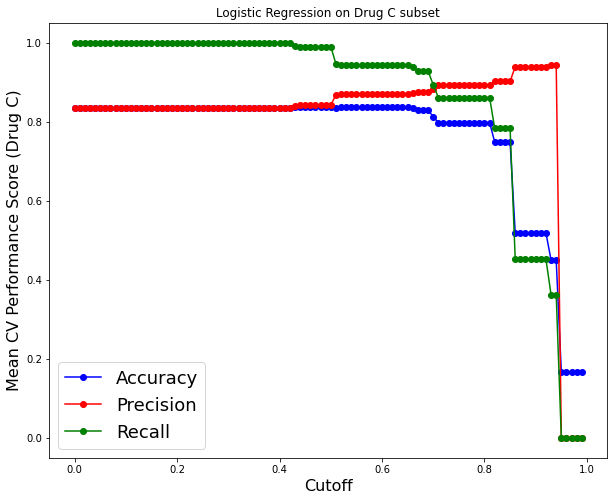

In [16]:
kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)
cutoffs = np.arange(0,1,.01)

accs_lr = np.zeros((10,len(cutoffs)))
precs_lr = np.zeros((10,len(cutoffs)))
recs_lr = np.zeros((10,len(cutoffs)))

log_reg = LogisticRegression()

i = 0
for train_index,test_index in kfold.split(X_C_train,y_C_train):
    X_train_train,X_train_test = X_C_train.iloc[train_index],X_C_train.iloc[test_index]
    y_train_train,y_train_test = y_C_train.iloc[train_index],y_C_train.iloc[test_index]
    
    
    
    for j in range(len(cutoffs)):
        log_reg_clone = clone(log_reg)
        log_reg_clone.fit(X_train_train,y_train_train)
        probs = log_reg_clone.predict_proba(X_train_test)[:,1]
        
        y_pred = 1*(probs > cutoffs[j])
        accs_lr[i,j] = accuracy_score(y_train_test,y_pred)
        precs_lr[i,j] = precision_score(y_train_test,y_pred)
        recs_lr[i,j] = recall_score(y_train_test,y_pred)
    i=i+1
print("CV Mean Accuracy is",np.mean(accs_lr,axis=0))
print("CV Mean Precision is",np.mean(precs_lr,axis=0))
print("CV Mean Recall is",np.mean(recs_lr,axis=0))

plt.figure(figsize=(10,8))     
plt.plot(np.arange(0,1,0.01), np.mean(accs_lr,axis=0),'b-o', label="Accuracy")
plt.plot(np.arange(0,1,0.01), np.mean(precs_lr,axis=0),'r-o', label="Precision")
plt.plot(np.arange(0,1,0.01), np.mean(recs_lr,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score (Drug C)",fontsize=16)
plt.xlabel("Cutoff",fontsize=16)
plt.title("Logistic Regression on Drug C subset")

plt.legend(fontsize=18)

plt.show()

C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

CV Mean Accuracy is [0.62969706 0.62969706 0.62969706 0.62969706 0.62969706 0.62969706
 0.63866027 0.63866027 0.66713377 0.67052707 0.67052707 0.67052707
 0.67052707 0.67052707 0.67327411 0.67744337 0.67744337 0.67744337
 0.67744337 0.70105792 0.70105792 0.70105792 0.70105792 0.70105792
 0.70105792 0.70105792 0.70105792 0.70105792 0.70105792 0.71531064
 0.71718523 0.71718523 0.71718523 0.71718523 0.71718523 0.71718523
 0.73512241 0.75655004 0.75655004 0.75655004 0.75655004 0.7569594
 0.75771352 0.75771352 0.75771352 0.75771352 0.75771352 0.75771352
 0.75771352 0.75734722 0.75759494 0.75772422 0.75772422 0.75772422
 0.75772422 0.75772422 0.75772422 0.75765958 0.75189603 0.73532705
 0.73532705 0.73532705 0.73532705 0.73532705 0.73532705 0.73339868
 0.73080236 0.73065155 0.73065155 0.73065155 0.73065155 0.73065155
 0.71880111 0.71656034 0.71656034 0.71656034 0.71656034 0.71656034
 0.71606479 0.71559077 0.71550458 0.71550458 0.70199508 0.69375376
 0.68883046 0.68883046 0.68883046 0.5898043

C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


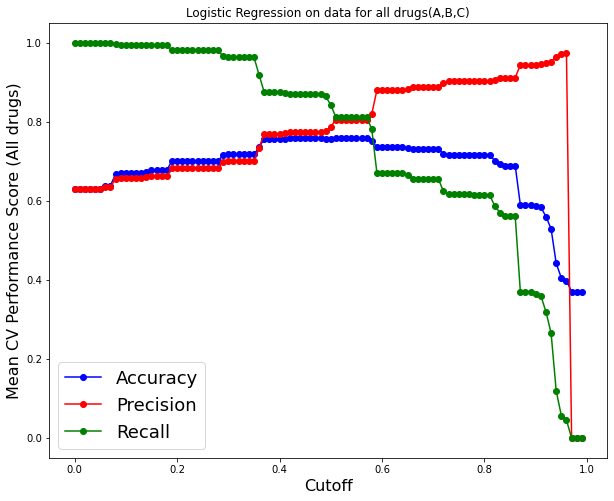

In [17]:
kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)
cutoffs = np.arange(0,1,.01)

accs_lr = np.zeros((10,len(cutoffs)))
precs_lr = np.zeros((10,len(cutoffs)))
recs_lr = np.zeros((10,len(cutoffs)))

log_reg = LogisticRegression()

i = 0
for train_index,test_index in kfold.split(X_drugs_train,y_drugs_train):
    X_train_train,X_train_test = X_drugs_train.iloc[train_index],X_drugs_train.iloc[test_index]
    y_train_train,y_train_test = y_drugs_train.iloc[train_index],y_drugs_train.iloc[test_index]
    
    
    
    for j in range(len(cutoffs)):
        log_reg_clone = clone(log_reg)
        log_reg_clone.fit(X_train_train,y_train_train)
        probs = log_reg_clone.predict_proba(X_train_test)[:,1]
        
        y_pred = 1*(probs > cutoffs[j])
        accs_lr[i,j] = accuracy_score(y_train_test,y_pred)
        precs_lr[i,j] = precision_score(y_train_test,y_pred)
        recs_lr[i,j] = recall_score(y_train_test,y_pred)
    i=i+1
print("CV Mean Accuracy is",np.mean(accs_lr,axis=0))
print("CV Mean Precision is",np.mean(precs_lr,axis=0))
print("CV Mean Recall is",np.mean(recs_lr,axis=0))

plt.figure(figsize=(10,8))    
plt.plot(np.arange(0,1,0.01), np.mean(accs_lr,axis=0),'b-o', label="Accuracy")
plt.plot(np.arange(0,1,0.01), np.mean(precs_lr,axis=0),'r-o', label="Precision")
plt.plot(np.arange(0,1,0.01), np.mean(recs_lr,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score (All drugs)",fontsize=16)
plt.xlabel("Cutoff",fontsize=16)
plt.title("Logistic Regression on data for all drugs(A,B,C)")

plt.legend(fontsize=18)

plt.show()  


### Decision Tree Classifier

CV Mean Accuracy is [0.90119051 0.90119051 0.90119051 0.90119051 0.90119051 0.90119051
 0.90119051 0.90119051 0.90119051 0.90119051]
CV Mean Precision is [0.90119051 0.90119051 0.90119051 0.90119051 0.90119051 0.90119051
 0.90119051 0.90119051 0.90119051 0.90119051]
CV Mean Recall is [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


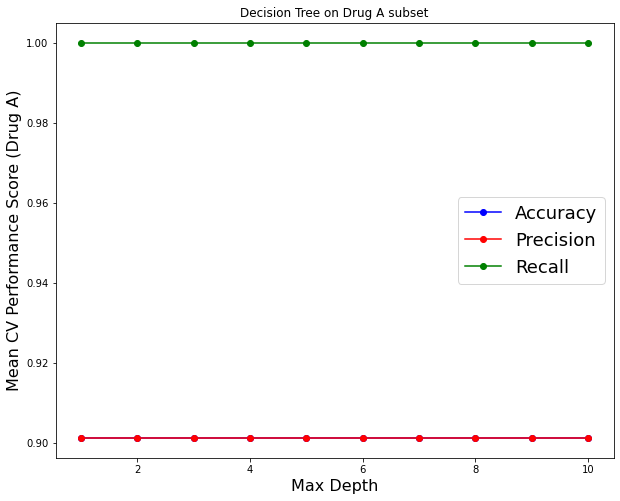

In [18]:
## Performing 10-fold Cross-validation while iterating max_depth
kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)
n=10
accs = np.zeros((10,n))
precs = np.zeros((10,n))
recs = np.zeros((10,n))
for j in range(1,n+1):
    tree_clf = DecisionTreeClassifier(max_depth=j,random_state=614)
    i=0
    for train_index,test_index in kfold.split(X_A_train,y_A_train):
        X_train_train,X_train_test = X_A_train.iloc[train_index],X_A_train.iloc[test_index]
        y_train_train,y_train_test = y_A_train.iloc[train_index],y_A_train.iloc[test_index]
    ## print(" for iteration",i,"X_train_train is",X_train_train,"and X_train_test is",X_train_test)
    
        tree_clf_clone = clone(tree_clf)
        tree_clf_clone.fit(X_train_train,y_train_train)
        y_predict = tree_clf_clone.predict(X_train_test)
        accs[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs[i,j-1] = precision_score(y_train_test,y_predict)
        recs[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

print("CV Mean Accuracy is",np.mean(accs,axis=0))
print("CV Mean Precision is",np.mean(precs,axis=0))
print("CV Mean Recall is",np.mean(recs,axis=0))

plt.figure(figsize=(10,8))

plt.plot(range(1,n+1), np.mean(accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,n+1), np.mean(precs,axis=0),'r-o', label="Precision")
plt.plot(range(1,n+1), np.mean(recs,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score (Drug A)",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=18)
plt.title("Decision Tree on Drug A subset")

plt.show()

CV Mean Accuracy is [0.65742271 0.65742271 0.65828572 0.65828572 0.65828572 0.65828572
 0.65828572 0.65828572 0.65828572 0.65828572]
CV Mean Precision is [0.57460459 0.57460459 0.56035803 0.56035803 0.56035803 0.56035803
 0.56035803 0.56035803 0.56035803 0.56035803]
CV Mean Recall is [0.46831683 0.46831683 0.5747816  0.5747816  0.5747816  0.5747816
 0.5747816  0.5747816  0.5747816  0.5747816 ]


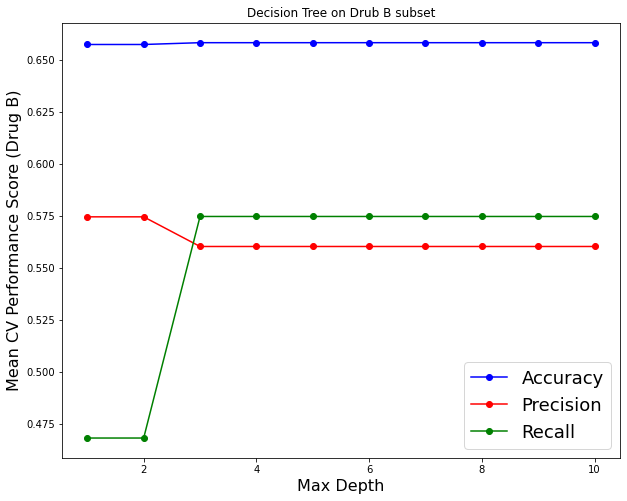

In [19]:
## Performing 10-fold Cross-validation while iterating max_depth
kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)
n=10
accs = np.zeros((10,n))
precs = np.zeros((10,n))
recs = np.zeros((10,n))
for j in range(1,n+1):
    tree_clf = DecisionTreeClassifier(max_depth=j,random_state=614)
    i=0
    for train_index,test_index in kfold.split(X_B_train,y_B_train):
        X_train_train,X_train_test = X_B_train.iloc[train_index],X_B_train.iloc[test_index]
        y_train_train,y_train_test = y_B_train.iloc[train_index],y_B_train.iloc[test_index]
    ## print(" for iteration",i,"X_train_train is",X_train_train,"and X_train_test is",X_train_test)
    
        tree_clf_clone = clone(tree_clf)
        tree_clf_clone.fit(X_train_train,y_train_train)
        y_predict = tree_clf_clone.predict(X_train_test)
        accs[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs[i,j-1] = precision_score(y_train_test,y_predict)
        recs[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

print("CV Mean Accuracy is",np.mean(accs,axis=0))
print("CV Mean Precision is",np.mean(precs,axis=0))
print("CV Mean Recall is",np.mean(recs,axis=0))

plt.figure(figsize=(10,8))

plt.plot(range(1,n+1), np.mean(accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,n+1), np.mean(precs,axis=0),'r-o', label="Precision")
plt.plot(range(1,n+1), np.mean(recs,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score (Drug B)",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=18)
plt.title("Decision Tree on Drub B subset")

plt.show()

CV Mean Accuracy is [0.83411803 0.83710732 0.83710732 0.83710732 0.83710732 0.83710732
 0.83710732 0.83710732 0.83710732 0.83710732]
CV Mean Precision is [0.83411803 0.84214251 0.84214251 0.84214251 0.84214251 0.84214251
 0.84214251 0.84214251 0.84214251 0.84214251]
CV Mean Recall is [1.         0.99035371 0.99035371 0.99035371 0.99035371 0.99035371
 0.99035371 0.99035371 0.99035371 0.99035371]


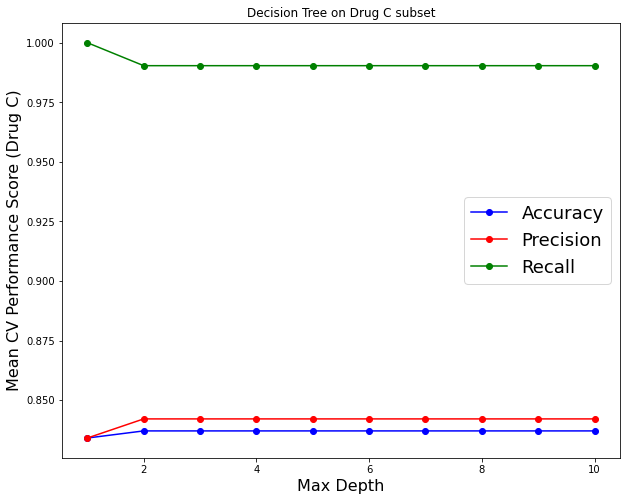

In [20]:
## Performing 10-fold Cross-validation while iterating max_depth
kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)
n=10
accs = np.zeros((10,n))
precs = np.zeros((10,n))
recs = np.zeros((10,n))
for j in range(1,n+1):
    tree_clf = DecisionTreeClassifier(max_depth=j,random_state=614)
    i=0
    for train_index,test_index in kfold.split(X_C_train,y_C_train):
        X_train_train,X_train_test = X_C_train.iloc[train_index],X_C_train.iloc[test_index]
        y_train_train,y_train_test = y_C_train.iloc[train_index],y_C_train.iloc[test_index]
    ## print(" for iteration",i,"X_train_train is",X_train_train,"and X_train_test is",X_train_test)
    
        tree_clf_clone = clone(tree_clf)
        tree_clf_clone.fit(X_train_train,y_train_train)
        y_predict = tree_clf_clone.predict(X_train_test)
        accs[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs[i,j-1] = precision_score(y_train_test,y_predict)
        recs[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

print("CV Mean Accuracy is",np.mean(accs,axis=0))
print("CV Mean Precision is",np.mean(precs,axis=0))
print("CV Mean Recall is",np.mean(recs,axis=0))

plt.figure(figsize=(10,8))

plt.plot(range(1,n+1), np.mean(accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,n+1), np.mean(precs,axis=0),'r-o', label="Precision")
plt.plot(range(1,n+1), np.mean(recs,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score (Drug C)",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=18)
plt.title("Decision Tree on Drug C subset")

plt.show()

CV Mean Accuracy is [0.73457301 0.75667932 0.75675469 0.75650688 0.75650688 0.75650688
 0.75650688 0.75650688 0.75650688 0.75650688]
CV Mean Precision is [0.84711843 0.78548853 0.79624276 0.78982316 0.78982316 0.78982316
 0.78982316 0.78982316 0.78982316 0.78982316]
CV Mean Recall is [0.70589041 0.84416002 0.82511825 0.83618749 0.83618749 0.83618749
 0.83618749 0.83618749 0.83618749 0.83618749]


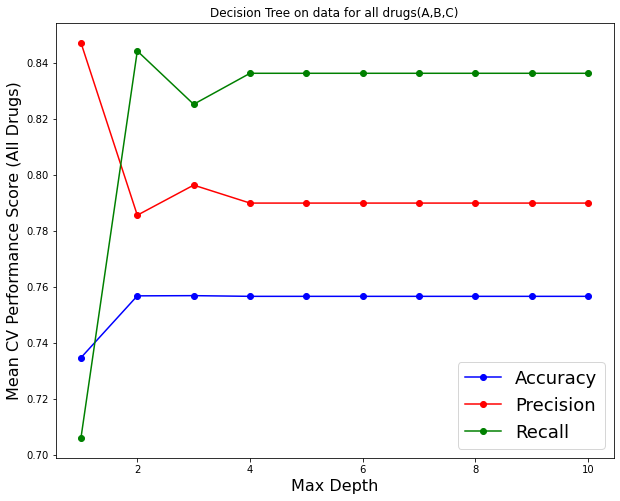

In [21]:
## Performing 10-fold Cross-validation while iterating max_depth
kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)
n=10
accs = np.zeros((10,n))
precs = np.zeros((10,n))
recs = np.zeros((10,n))
for j in range(1,n+1):
    tree_clf = DecisionTreeClassifier(max_depth=j,random_state=614)
    i=0
    for train_index,test_index in kfold.split(X_drugs_train,y_drugs_train):
        X_train_train,X_train_test = X_drugs_train.iloc[train_index],X_drugs_train.iloc[test_index]
        y_train_train,y_train_test = y_drugs_train.iloc[train_index],y_drugs_train.iloc[test_index]
    ## print(" for iteration",i,"X_train_train is",X_train_train,"and X_train_test is",X_train_test
    
        tree_clf_clone = clone(tree_clf)
        tree_clf_clone.fit(X_train_train,y_train_train)
        y_predict = tree_clf_clone.predict(X_train_test)
        accs[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs[i,j-1] = precision_score(y_train_test,y_predict)
        recs[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

print("CV Mean Accuracy is",np.mean(accs,axis=0))
print("CV Mean Precision is",np.mean(precs,axis=0))
print("CV Mean Recall is",np.mean(recs,axis=0))

plt.figure(figsize=(10,8))

plt.plot(range(1,n+1), np.mean(accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,n+1), np.mean(precs,axis=0),'r-o', label="Precision")
plt.plot(range(1,n+1), np.mean(recs,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score (All Drugs)",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=18)
plt.title("Decision Tree on data for all drugs(A,B,C)")

plt.show()

### Random Forest Classifier

CV Mean Accuracy is [0.90119051 0.90119051 0.90119051 0.90119051 0.90119051 0.90119051
 0.90119051 0.90119051]
CV Mean Precision is [0.90119051 0.90119051 0.90119051 0.90119051 0.90119051 0.90119051
 0.90119051 0.90119051]
CV Mean Recall is [1. 1. 1. 1. 1. 1. 1. 1.]


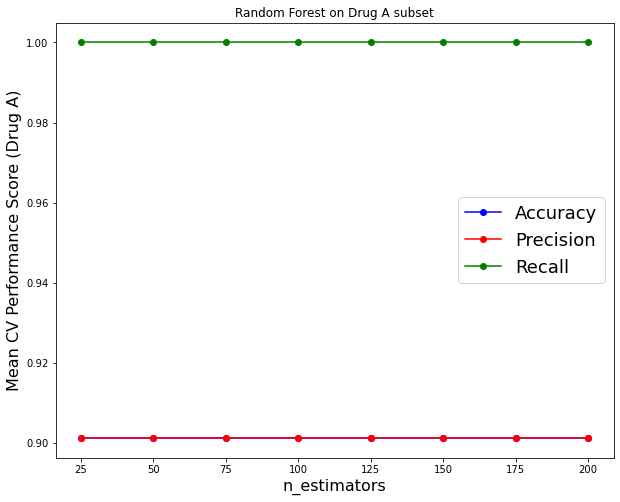

In [22]:
## Performing 10-fold Cross-validation while iterating n_estimators
kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)
trees =np.arange(25,225,25)
accs_rf = np.zeros((10,len(trees)))
precs_rf = np.zeros((10,len(trees)))
recs_rf = np.zeros((10,len(trees)))
for j in range(len(trees)):
    rf_clf = RandomForestClassifier(n_estimators=trees[j-1],random_state=614)
    i=0
    for train_index,test_index in kfold.split(X_A_train,y_A_train):
        X_train_train,X_train_test = X_A_train.iloc[train_index],X_A_train.iloc[test_index]
        y_train_train,y_train_test = y_A_train.iloc[train_index],y_A_train.iloc[test_index]
    ## print(" for iteration",i,"X_train_train is",X_train_train,"and X_train_test is",X_train_test)
    
        rf_clf_clone = clone(rf_clf)
        rf_clf_clone.fit(X_train_train,y_train_train)
        y_predict = rf_clf_clone.predict(X_train_test)
        accs_rf[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs_rf[i,j-1] = precision_score(y_train_test,y_predict)
        recs_rf[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

print("CV Mean Accuracy is",np.mean(accs_rf,axis=0))
print("CV Mean Precision is",np.mean(precs_rf,axis=0))
print("CV Mean Recall is",np.mean(recs_rf,axis=0))

plt.figure(figsize=(10,8))

plt.plot(np.arange(25,225,25), np.mean(accs_rf,axis=0),'b-o', label="Accuracy")
plt.plot(np.arange(25,225,25), np.mean(precs_rf,axis=0),'r-o', label="Precision")
plt.plot(np.arange(25,225,25), np.mean(recs_rf,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score (Drug A)",fontsize=16)
plt.xlabel("n_estimators",fontsize=16)

plt.legend(fontsize=18)
plt.title("Random Forest on Drug A subset")

plt.show()

CV Mean Accuracy is [0.65828572 0.65828572 0.65828572 0.65828572 0.65828572 0.65828572
 0.65828572 0.65828572]
CV Mean Precision is [0.56035803 0.56035803 0.56035803 0.56035803 0.56035803 0.56035803
 0.56035803 0.56035803]
CV Mean Recall is [0.5747816 0.5747816 0.5747816 0.5747816 0.5747816 0.5747816 0.5747816
 0.5747816]


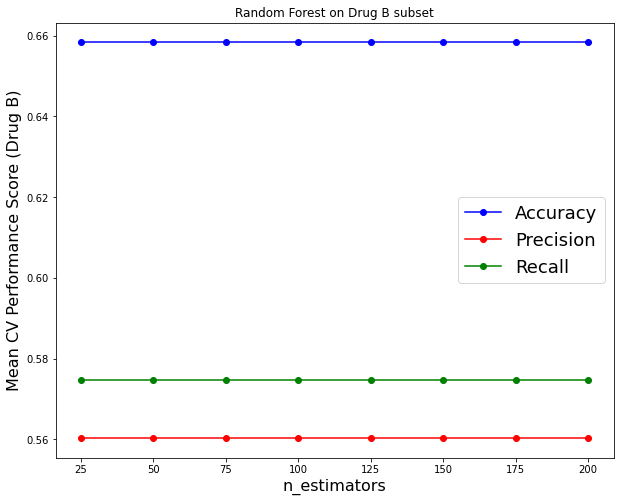

In [23]:
## Performing 10-fold Cross-validation while iterating n_estimators
kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)
trees =np.arange(25,225,25)
accs_rf = np.zeros((10,len(trees)))
precs_rf = np.zeros((10,len(trees)))
recs_rf = np.zeros((10,len(trees)))
for j in range(len(trees)):
    rf_clf = RandomForestClassifier(n_estimators=trees[j-1],random_state=614)
    i=0
    for train_index,test_index in kfold.split(X_B_train,y_B_train):
        X_train_train,X_train_test = X_B_train.iloc[train_index],X_B_train.iloc[test_index]
        y_train_train,y_train_test = y_B_train.iloc[train_index],y_B_train.iloc[test_index]
    ## print(" for iteration",i,"X_train_train is",X_train_train,"and X_train_test is",X_train_test)
    
        rf_clf_clone = clone(rf_clf)
        rf_clf_clone.fit(X_train_train,y_train_train)
        y_predict = rf_clf_clone.predict(X_train_test)
        accs_rf[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs_rf[i,j-1] = precision_score(y_train_test,y_predict)
        recs_rf[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

print("CV Mean Accuracy is",np.mean(accs_rf,axis=0))
print("CV Mean Precision is",np.mean(precs_rf,axis=0))
print("CV Mean Recall is",np.mean(recs_rf,axis=0))
plt.figure(figsize=(10,8))

plt.plot(np.arange(25,225,25), np.mean(accs_rf,axis=0),'b-o', label="Accuracy")
plt.plot(np.arange(25,225,25), np.mean(precs_rf,axis=0),'r-o', label="Precision")
plt.plot(np.arange(25,225,25), np.mean(recs_rf,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score (Drug B)",fontsize=16)
plt.xlabel("n_estimators",fontsize=16)

plt.legend(fontsize=18)
plt.title("Random Forest on Drug B subset")

plt.show()


CV Mean Accuracy is [0.83710732 0.83710732 0.83710732 0.83710732 0.83710732 0.83710732
 0.83710732 0.83710732]
CV Mean Precision is [0.84214251 0.84214251 0.84214251 0.84214251 0.84214251 0.84214251
 0.84214251 0.84214251]
CV Mean Recall is [0.99035371 0.99035371 0.99035371 0.99035371 0.99035371 0.99035371
 0.99035371 0.99035371]


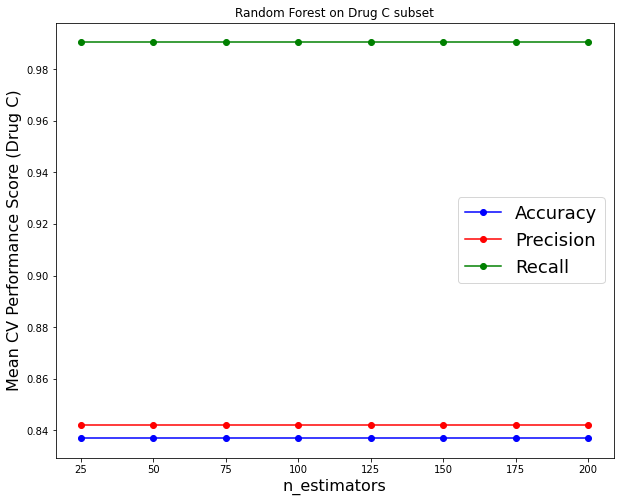

In [24]:
## Performing 10-fold Cross-validation while iterating n_estimators
kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)
trees =np.arange(25,225,25)
accs_rf = np.zeros((10,len(trees)))
precs_rf = np.zeros((10,len(trees)))
recs_rf = np.zeros((10,len(trees)))
for j in range(len(trees)):
    rf_clf = RandomForestClassifier(n_estimators=trees[j-1],random_state=614)
    i=0
    for train_index,test_index in kfold.split(X_C_train,y_C_train):
        X_train_train,X_train_test = X_C_train.iloc[train_index],X_C_train.iloc[test_index]
        y_train_train,y_train_test = y_C_train.iloc[train_index],y_C_train.iloc[test_index]
    ## print(" for iteration",i,"X_train_train is",X_train_train,"and X_train_test is",X_train_test)
    
        rf_clf_clone = clone(rf_clf)
        rf_clf_clone.fit(X_train_train,y_train_train)
        y_predict = rf_clf_clone.predict(X_train_test)
        accs_rf[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs_rf[i,j-1] = precision_score(y_train_test,y_predict)
        recs_rf[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

print("CV Mean Accuracy is",np.mean(accs_rf,axis=0))
print("CV Mean Precision is",np.mean(precs_rf,axis=0))
print("CV Mean Recall is",np.mean(recs_rf,axis=0))
plt.figure(figsize=(10,8))

plt.plot(np.arange(25,225,25), np.mean(accs_rf,axis=0),'b-o', label="Accuracy")
plt.plot(np.arange(25,225,25), np.mean(precs_rf,axis=0),'r-o', label="Precision")
plt.plot(np.arange(25,225,25), np.mean(recs_rf,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score (Drug C)",fontsize=16)
plt.xlabel("n_estimators",fontsize=16)

plt.legend(fontsize=18)
plt.title("Random Forest on Drug C subset")

plt.show()


CV Mean Accuracy is [0.75716408 0.75663616 0.75663616 0.75663616 0.75663616 0.75663616
 0.75663616 0.75663616]
CV Mean Precision is [0.78571588 0.78855297 0.78855297 0.78855297 0.78855297 0.78855297
 0.78855297 0.78855297]
CV Mean Recall is [0.84535772 0.83902753 0.83902753 0.83902753 0.83902753 0.83902753
 0.83902753 0.83902753]


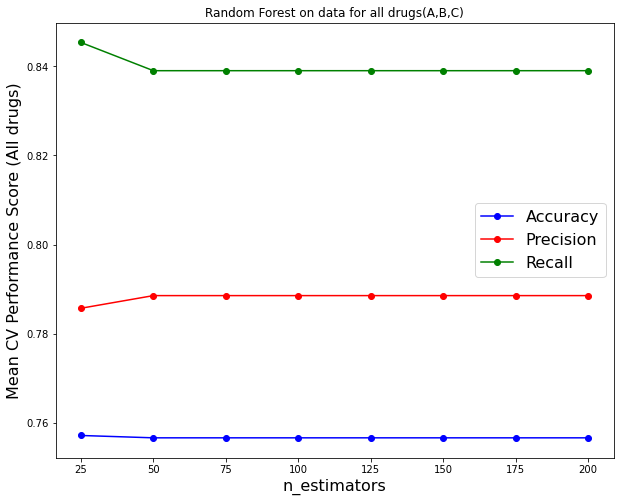

In [25]:
## Performing 10-fold Cross-validation while iterating n_estimators
kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)
trees =np.arange(25,225,25)
accs_rf = np.zeros((10,len(trees)))
precs_rf = np.zeros((10,len(trees)))
recs_rf = np.zeros((10,len(trees)))
for j in range(len(trees)):
    rf_clf = RandomForestClassifier(n_estimators=trees[j-1],random_state=614)
    i=0
    for train_index,test_index in kfold.split(X_drugs_train,y_drugs_train):
        X_train_train,X_train_test = X_drugs_train.iloc[train_index],X_drugs_train.iloc[test_index]
        y_train_train,y_train_test = y_drugs_train.iloc[train_index],y_drugs_train.iloc[test_index]
    ## print(" for iteration",i,"X_train_train is",X_train_train,"and X_train_test is",X_train_test)
    
        rf_clf_clone = clone(rf_clf)
        rf_clf_clone.fit(X_train_train,y_train_train)
        y_predict = rf_clf_clone.predict(X_train_test)
        accs_rf[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs_rf[i,j-1] = precision_score(y_train_test,y_predict)
        recs_rf[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

print("CV Mean Accuracy is",np.mean(accs_rf,axis=0))
print("CV Mean Precision is",np.mean(precs_rf,axis=0))
print("CV Mean Recall is",np.mean(recs_rf,axis=0))
plt.figure(figsize=(10,8))

plt.plot(np.arange(25,225,25), np.mean(accs_rf,axis=0),'b-o', label="Accuracy")
plt.plot(np.arange(25,225,25), np.mean(precs_rf,axis=0),'r-o', label="Precision")
plt.plot(np.arange(25,225,25), np.mean(recs_rf,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score (All drugs)",fontsize=16)
plt.xlabel("n_estimators",fontsize=16)

plt.legend(fontsize=16)
plt.title("Random Forest on data for all drugs(A,B,C)")

plt.show()

### KNN Classifier

CV Mean Accuracy is [0.88975197 0.89137046 0.90119051 0.90119051]
CV Mean Precision is [0.91268143 0.91141044 0.90119051 0.90119051]
CV Mean Recall is [0.97114545 0.9747352  1.         1.        ]


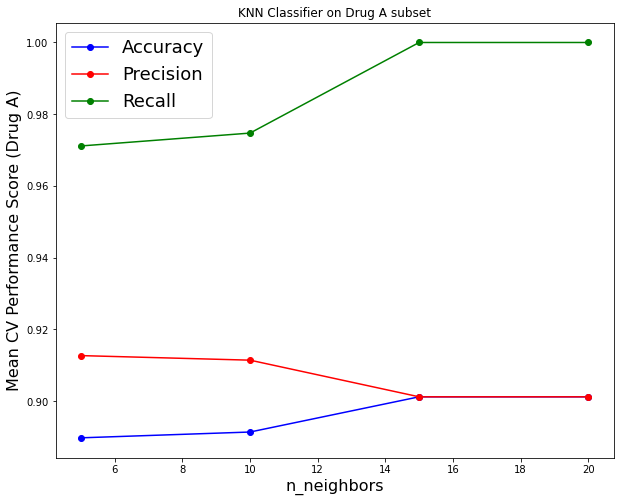

In [27]:
## Performing 10-fold Cross-validation while iterating n_neighbors
kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)
neighbors =np.arange(5,25,5)
accs_knn = np.zeros((10,len(neighbors)))
precs_knn = np.zeros((10,len(neighbors)))
recs_knn = np.zeros((10,len(neighbors)))
for j in range(len(neighbors)):
    knn = KNeighborsClassifier(n_neighbors=neighbors[j-1])
    i=0
    for train_index,test_index in kfold.split(X_A_train,y_A_train):
        X_train_train,X_train_test = X_A_train.iloc[train_index],X_A_train.iloc[test_index]
        y_train_train,y_train_test = y_A_train.iloc[train_index],y_A_train.iloc[test_index]
    ## print(" for iteration",i,"X_train_train is",X_train_train,"and X_train_test is",X_train_test)
    
        knn_clone = clone(knn)
        knn_clone.fit(X_train_train,y_train_train)
        y_predict = knn_clone.predict(X_train_test)
        accs_knn[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs_knn[i,j-1] = precision_score(y_train_test,y_predict)
        recs_knn[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

print("CV Mean Accuracy is",np.mean(accs_knn,axis=0))
print("CV Mean Precision is",np.mean(precs_knn,axis=0))
print("CV Mean Recall is",np.mean(recs_knn,axis=0))
plt.figure(figsize=(10,8))

plt.plot(np.arange(5,25,5), np.mean(accs_knn,axis=0),'b-o', label="Accuracy")
plt.plot(np.arange(5,25,5), np.mean(precs_knn,axis=0),'r-o', label="Precision")
plt.plot(np.arange(5,25,5), np.mean(recs_knn,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score (Drug A)",fontsize=16)
plt.xlabel("n_neighbors",fontsize=16)

plt.legend(fontsize=18)
plt.title("KNN Classifier on Drug A subset")

plt.show()

C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CV Mean Accuracy is [0.62267145 0.64831532 0.65412954 0.65447021]
CV Mean Precision is [0.49900384 0.4574262  0.5166216  0.56872244]
CV Mean Recall is [0.52847991 0.39592312 0.4439138  0.45474665]


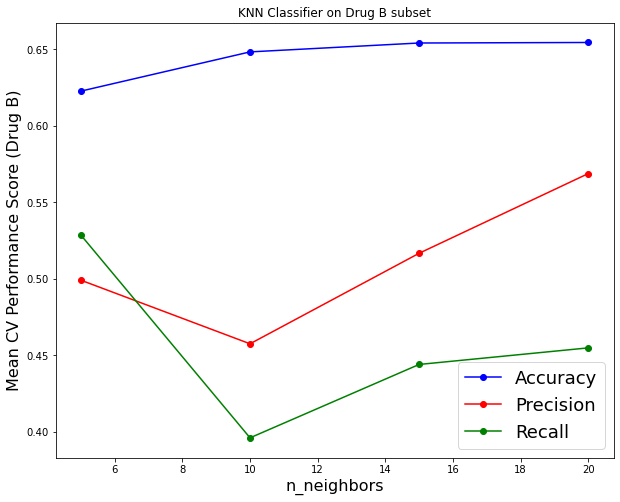

In [28]:
## Performing 10-fold Cross-validation while iterating n_neighbors
kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)
neighbors =np.arange(5,25,5)
accs_knn = np.zeros((10,len(neighbors)))
precs_knn = np.zeros((10,len(neighbors)))
recs_knn = np.zeros((10,len(neighbors)))
for j in range(len(neighbors)):
    knn = KNeighborsClassifier(n_neighbors=neighbors[j-1])
    i=0
    for train_index,test_index in kfold.split(X_B_train,y_B_train):
        X_train_train,X_train_test = X_B_train.iloc[train_index],X_B_train.iloc[test_index]
        y_train_train,y_train_test = y_B_train.iloc[train_index],y_B_train.iloc[test_index]
    ## print(" for iteration",i,"X_train_train is",X_train_train,"and X_train_test is",X_train_test)
    
        knn_clone = clone(knn)
        knn_clone.fit(X_train_train,y_train_train)
        y_predict = knn_clone.predict(X_train_test)
        accs_knn[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs_knn[i,j-1] = precision_score(y_train_test,y_predict)
        recs_knn[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

print("CV Mean Accuracy is",np.mean(accs_knn,axis=0))
print("CV Mean Precision is",np.mean(precs_knn,axis=0))
print("CV Mean Recall is",np.mean(recs_knn,axis=0))
plt.figure(figsize=(10,8))

plt.plot(np.arange(5,25,5), np.mean(accs_knn,axis=0),'b-o', label="Accuracy")
plt.plot(np.arange(5,25,5), np.mean(precs_knn,axis=0),'r-o', label="Precision")
plt.plot(np.arange(5,25,5), np.mean(recs_knn,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score (Drug B)",fontsize=16)
plt.xlabel("n_neighbors",fontsize=16)

plt.legend(fontsize=18)
plt.title("KNN Classifier on Drug B subset")

plt.show()

CV Mean Accuracy is [0.80975541 0.79398445 0.8252002  0.83102983]
CV Mean Precision is [0.84764767 0.84978968 0.84749019 0.84835959]
CV Mean Recall is [0.94305155 0.9161648  0.96452203 0.97252827]


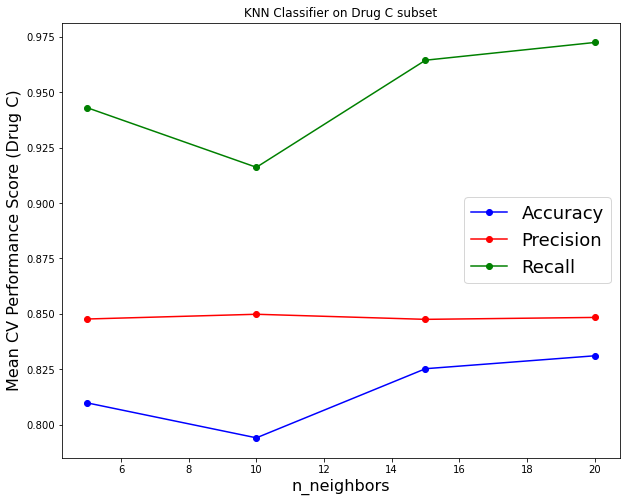

In [29]:
## Performing 10-fold Cross-validation while iterating n_neighbors
kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)
neighbors =np.arange(5,25,5)
accs_knn = np.zeros((10,len(neighbors)))
precs_knn = np.zeros((10,len(neighbors)))
recs_knn = np.zeros((10,len(neighbors)))
for j in range(len(neighbors)):
    knn = KNeighborsClassifier(n_neighbors=neighbors[j-1])
    i=0
    for train_index,test_index in kfold.split(X_C_train,y_C_train):
        X_train_train,X_train_test = X_C_train.iloc[train_index],X_C_train.iloc[test_index]
        y_train_train,y_train_test = y_C_train.iloc[train_index],y_C_train.iloc[test_index]
    ## print(" for iteration",i,"X_train_train is",X_train_train,"and X_train_test is",X_train_test)
    
        knn_clone = clone(knn)
        knn_clone.fit(X_train_train,y_train_train)
        y_predict = knn_clone.predict(X_train_test)
        accs_knn[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs_knn[i,j-1] = precision_score(y_train_test,y_predict)
        recs_knn[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

print("CV Mean Accuracy is",np.mean(accs_knn,axis=0))
print("CV Mean Precision is",np.mean(precs_knn,axis=0))
print("CV Mean Recall is",np.mean(recs_knn,axis=0))
plt.figure(figsize=(10,8))

plt.plot(np.arange(5,25,5), np.mean(accs_knn,axis=0),'b-o', label="Accuracy")
plt.plot(np.arange(5,25,5), np.mean(precs_knn,axis=0),'r-o', label="Precision")
plt.plot(np.arange(5,25,5), np.mean(recs_knn,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score (Drug C)",fontsize=16)
plt.xlabel("n_neighbors",fontsize=16)

plt.legend(fontsize=18)
plt.title("KNN Classifier on Drug C subset")

plt.show()

CV Mean Accuracy is [0.74105797 0.74175843 0.74730651 0.74511974]
CV Mean Precision is [0.80895335 0.82377267 0.80901798 0.81605144]
CV Mean Recall is [0.77516078 0.7571796  0.79019927 0.77468184]


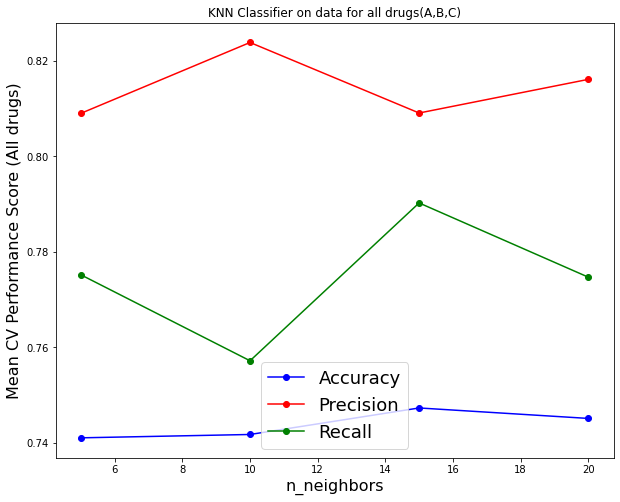

In [30]:
## Performing 10-fold Cross-validation while iterating n_neighbors
kfold = StratifiedKFold(n_splits=10,shuffle = True,random_state=440)
neighbors =np.arange(5,25,5)
accs_knn = np.zeros((10,len(neighbors)))
precs_knn = np.zeros((10,len(neighbors)))
recs_knn = np.zeros((10,len(neighbors)))
for j in range(len(neighbors)):
    knn = KNeighborsClassifier(n_neighbors=neighbors[j-1])
    i=0
    for train_index,test_index in kfold.split(X_drugs_train,y_drugs_train):
        X_train_train,X_train_test = X_drugs_train.iloc[train_index],X_drugs_train.iloc[test_index]
        y_train_train,y_train_test = y_drugs_train.iloc[train_index],y_drugs_train.iloc[test_index]
    ## print(" for iteration",i,"X_train_train is",X_train_train,"and X_train_test is",X_train_test)
    
        knn_clone = clone(knn)
        knn_clone.fit(X_train_train,y_train_train)
        y_predict = knn_clone.predict(X_train_test)
        accs_knn[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs_knn[i,j-1] = precision_score(y_train_test,y_predict)
        recs_knn[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

print("CV Mean Accuracy is",np.mean(accs_knn,axis=0))
print("CV Mean Precision is",np.mean(precs_knn,axis=0))
print("CV Mean Recall is",np.mean(recs_knn,axis=0))

plt.figure(figsize=(10,8))

plt.plot(np.arange(5,25,5), np.mean(accs_knn,axis=0),'b-o', label="Accuracy")
plt.plot(np.arange(5,25,5), np.mean(precs_knn,axis=0),'r-o', label="Precision")
plt.plot(np.arange(5,25,5), np.mean(recs_knn,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score (All drugs)",fontsize=16)
plt.xlabel("n_neighbors",fontsize=16)

plt.legend(fontsize=18)
plt.title("KNN Classifier on data for all drugs(A,B,C)")

plt.show()
